# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

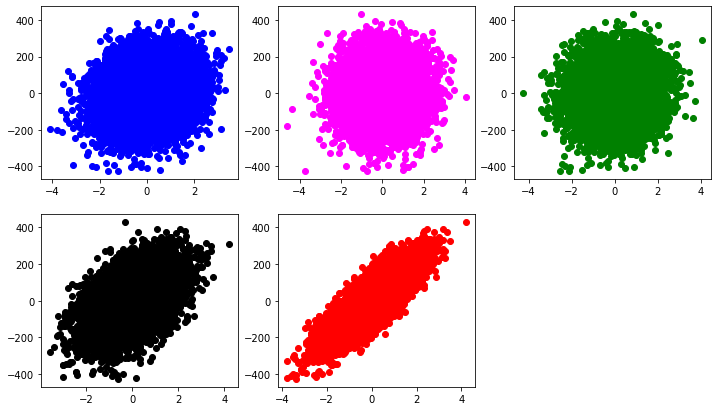

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,7)
x1=X[:,0]
x2=X[:,1]
x3=X[:,2]
x4=X[:,3]
x5=X[:,4]
plt.subplot(2, 3, 1)
plt.scatter(x1, y, c ="blue")
plt.subplot(2, 3, 2)
plt.scatter(x2, y, c ="magenta")
plt.subplot(2, 3, 3)
plt.scatter(x3, y, c ="green")
plt.subplot(2, 3, 4)
plt.scatter(x4, y, c ="black")
plt.subplot(2, 3, 5)
plt.scatter(x5, y, c ="red")

 
# To show the plot
plt.show()


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping


In [74]:
model = keras.Sequential([
    layers.Dense(5, activation='relu', input_shape=[5]),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,decay=1e-6),
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150
)



Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 1773.4591 - mean_squared_error: 1773.4591 - val_loss: 133.5091 - val_mean_squared_error: 133.5091
Epoch 2/150
200/200 [==============================] - 1s 3ms/step - loss: 197.6714 - mean_squared_error: 197.6714 - val_loss: 61.2283 - val_mean_squared_error: 61.2283
Epoch 3/150
200/200 [==============================] - 1s 3ms/step - loss: 197.4841 - mean_squared_error: 197.4841 - val_loss: 138.2643 - val_mean_squared_error: 138.2643
Epoch 4/150
200/200 [==============================] - 1s 3ms/step - loss: 184.2130 - mean_squared_error: 184.2130 - val_loss: 50.7594 - val_mean_squared_error: 50.7594
Epoch 5/150
200/200 [==============================] - 1s 3ms/step - loss: 240.9120 - mean_squared_error: 240.9120 - val_loss: 28.2061 - val_mean_squared_error: 28.2061
Epoch 6/150
200/200 [==============================] - 1s 3ms/step - loss: 238.3668 - mean_squared_error: 238.3668 - val_loss: 1189.4244 - val_mean_s

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

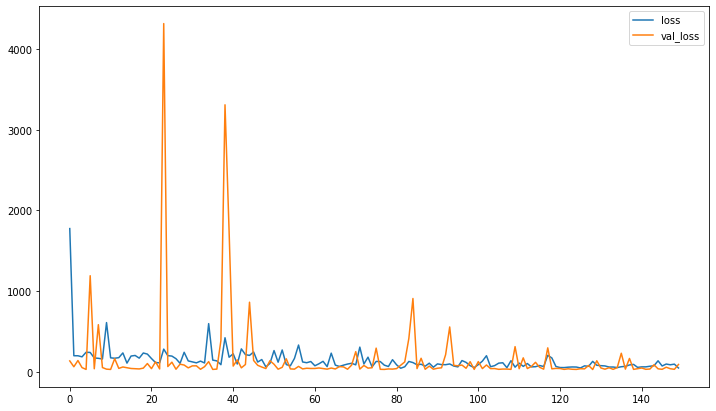

In [75]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
#print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [76]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
y_pred=model.predict(X_test)
print('\nMSE:',test_acc)


MSE: 88.50431060791016


## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [77]:
# Insert the function for R2 Score
def r2_score(y_true, y_pred):
      #1-ssr/sst
      error=y_true-y_pred
      mean=np.mean(y_true)
      ssr =np.sum(np.multiply(error,error)) # sum squared regression (SSR)
      sst=np.sum(np.multiply(y_true-mean,y_true-mean)) # total sum of squares (SST)
      r2 = 1-ssr/sst
      return r2

accu = r2_score(y_test,y_pred.squeeze()) 
print("Accuracy:", accu)
  

Accuracy: 0.9936519653888535


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

Epoch 1/1000
25/25 [==============================] - 1s 9ms/step - loss: 13914.7354 - mean_squared_error: 13914.7354 - val_loss: 13973.9863 - val_mean_squared_error: 13973.9863
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 13836.6016 - mean_squared_error: 13836.6016 - val_loss: 13947.3164 - val_mean_squared_error: 13947.3164
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 13762.5527 - mean_squared_error: 13762.5527 - val_loss: 13915.5166 - val_mean_squared_error: 13915.5166
Epoch 4/1000
25/25 [==============================] - 0s 9ms/step - loss: 13691.7109 - mean_squared_error: 13691.7109 - val_loss: 13875.9023 - val_mean_squared_error: 13875.9023
Epoch 5/1000
25/25 [==============================] - 0s 9ms/step - loss: 13618.9062 - mean_squared_error: 13618.9062 - val_loss: 13825.5850 - val_mean_squared_error: 13825.5850
Epoch 6/1000
25/25 [==============================] - 0s 11ms/step - loss: 13540.7686 - mean_squared_error: 13

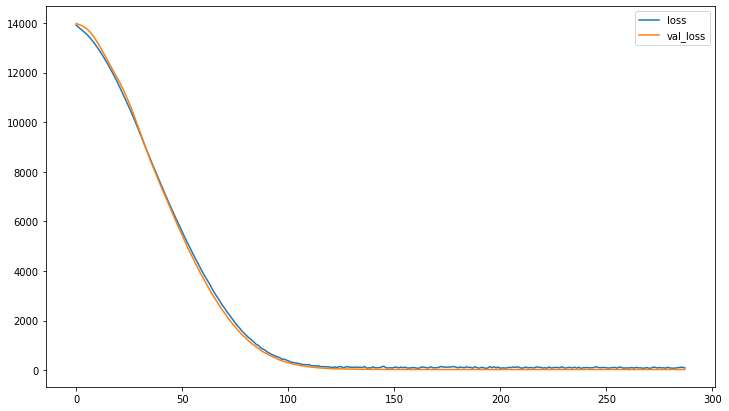

In [69]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=[5]),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, 
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [70]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
y_pred=model.predict(X_test)
print('\nMSE:',test_acc)


MSE: 25.362564086914062


In [71]:
accu = r2_score(y_test,y_pred.squeeze()) 
print("Accuracy:", accu)

Accuracy: 0.9981808522138836
